## **EX NO:**
##   **DATE :**
# <center>**SIMPLE LINEAR REGRESSION**</center>

## **AIM :**

#### To perform  Simple Linear Regression on a dataset and  analyze the correlation  between the independent  and  dependent variables to Predict a student's final exam score (Y) based on the number of hours they studied(X).

### **PROGRAM :**

#### **Importing Headers**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import scipy.stats as stats

#### **Importing the data set**

In [ ]:
df = pd.read_csv("Food_Delivery.csv")

In [ ]:
df.head()

,Order_ID,Distance_km,Weather,Traffic_Level,Time_of_Day,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
0,522,7.93,Windy,Low,Afternoon,Scooter,12,1.0,43
1,738,16.42,Clear,Medium,Evening,Bike,20,2.0,84
2,741,9.52,Foggy,Low,Night,Scooter,28,1.0,59
3,661,7.44,Rainy,Medium,Afternoon,Scooter,5,1.0,37
4,412,19.03,Clear,Low,Morning,Bike,16,5.0,68


#### **Infomation about the data set**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Order_ID                1000 non-null   int64  
 1   Distance_km             1000 non-null   float64
 2   Weather                 970 non-null    object 
 3   Traffic_Level           970 non-null    object 
 4   Time_of_Day             970 non-null    object 
 5   Vehicle_Type            1000 non-null   object 
 6   Preparation_Time_min    1000 non-null   int64  
 7   Courier_Experience_yrs  970 non-null    float64
 8   Delivery_Time_min       1000 non-null   int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 70.4+ KB


#### **Description of the Data Set**





In [ ]:
df.describe()

,Order_ID,Distance_km,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
count,1000.000000,1000.000000,1000.000000,970.000000,1000.000000
mean,500.500000,10.059970,16.982000,4.579381,56.732000
std,288.819436,5.696656,7.204553,2.914394,22.070915
min,1.000000,0.590000,5.000000,0.000000,8.000000
25%,250.750000,5.105000,11.000000,2.000000,41.000000
50%,500.500000,10.190000,17.000000,5.000000,55.500000
75%,750.250000,15.017500,23.000000,7.000000,71.000000
max,1000.000000,19.990000,29.000000,9.000000,153.000000


#### **Shape of the data set**

In [ ]:
df.shape

(1000, 9)

#### **Check if there are any zero or null values**

In [ ]:
df.isnull().sum()

,0
Order_ID,0
Distance_km,0
Weather,30
Traffic_Level,30
Time_of_Day,30
Vehicle_Type,0
Preparation_Time_min,0
Courier_Experience_yrs,30
Delivery_Time_min,0


#### As there are null values in the data set, we would build a model before and after preprocessing the data set

#### **Mean Values of the Variables**


In [ ]:
df.Distance_km.agg('mean')

10.05997

In [ ]:
df.Preparation_Time_min.agg('mean')

16.982

In [ ]:
df.Delivery_Time_min.agg('mean')

56.732

#### **Bar Plot**

Text(0.5, 1.0, 'Bar plot : Delivery Time')

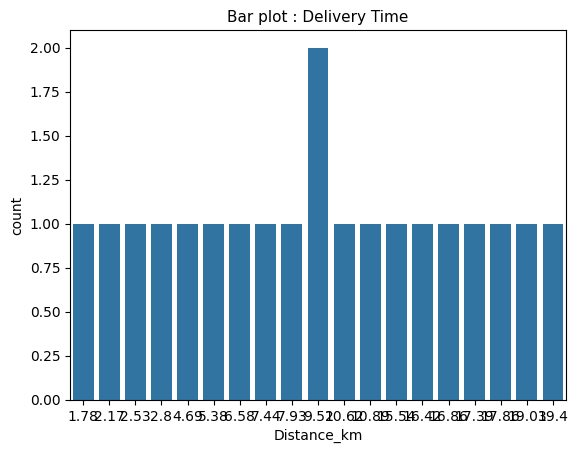

In [ ]:
sns.countplot(x='Distance_km',data=df.head(20))
plt.title('Bar plot : Delivery Time',fontsize = 11)

#### **Histogram**

Text(0.5, 0, 'DeliveryTime (in mts)')

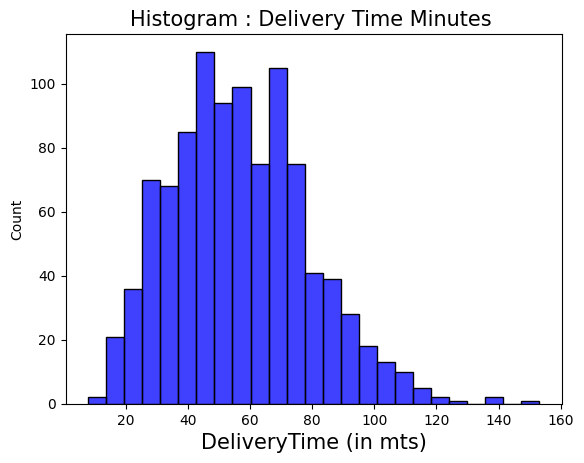

In [ ]:
sns.histplot(x='Delivery_Time_min',data=df,color='b')
plt.title('Histogram : Delivery Time Minutes ' , fontsize=15)
plt.xlabel('DeliveryTime (in mts)',fontsize=15)

#### **Box Plot**

<Axes: xlabel='Delivery_Time_min'>

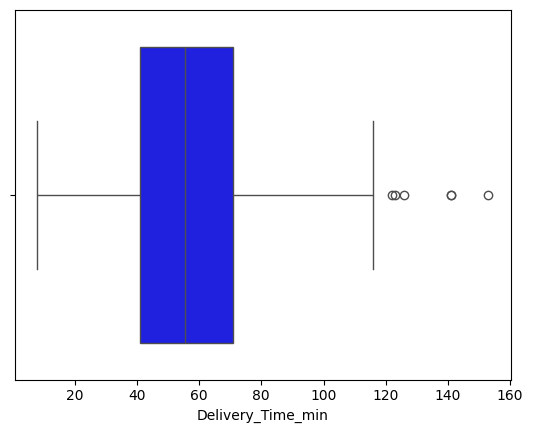

In [ ]:
sns.boxplot(x='Delivery_Time_min',data=df,color='b')

Thus from the above Box Plot we can verify that the average Delivery time in minutes is 56.732 , which is calculated by the mean aggregration of the given data.

#### **Scatter Plot**

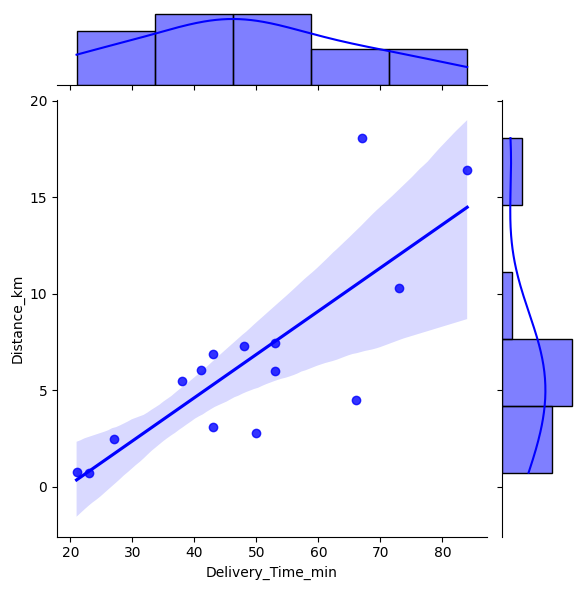

In [ ]:
sns.jointplot(x='Delivery_Time_min',y='Distance_km',data=df.sample(15),color='b',kind='reg')

#### **Pair Plot**

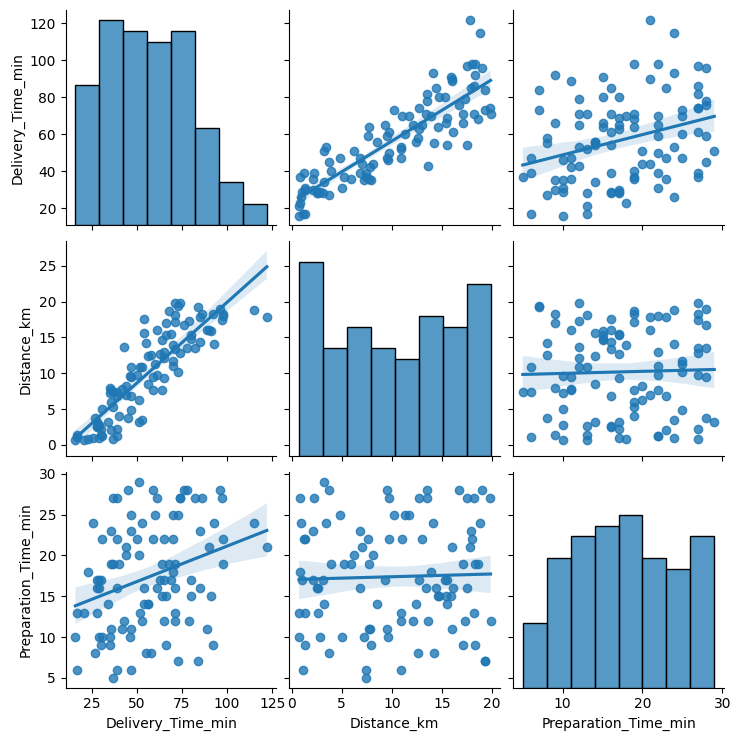

In [ ]:
d=df[['Delivery_Time_min','Distance_km','Preparation_Time_min']].sample(100)
sns.pairplot(d,kind='reg')

#### **Label Encoder - To convert categorical values to numeric**

In [ ]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['Weather'] = label_encoder.fit_transform(df['Weather'])
# Traffic_Level
df['Traffic_Level'] = label_encoder.fit_transform(df['Traffic_Level'])
# Time_of_Day
df['Time_of_Day'] = label_encoder.fit_transform(df['Time_of_Day'])
# Vehicle_Type
df['Vehicle_Type'] = label_encoder.fit_transform(df['Vehicle_Type'])

#### **Heat Map**

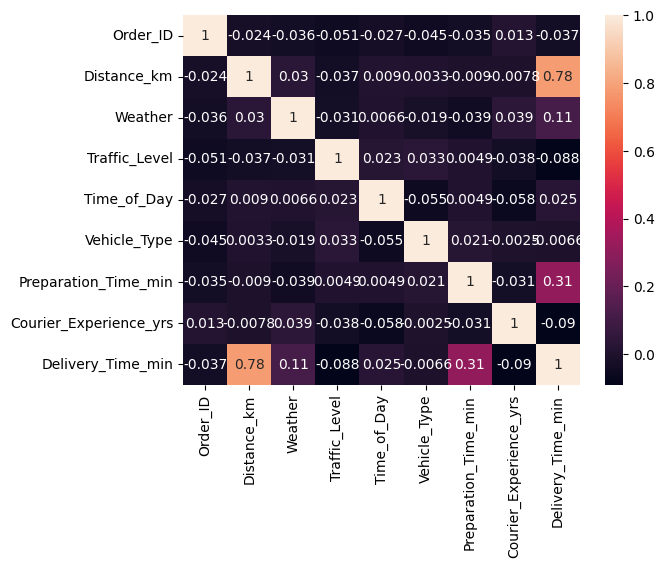

In [ ]:
corr=df.corr()
plt.figure(dpi=100)
sns.heatmap(df.corr(),annot=True)
plt.show()

#### **Splitting variables**

In [ ]:
x=df[['Distance_km']]
y=df['Delivery_Time_min']

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

#### **Fitting Linear Regression Model**

In [ ]:
model=LinearRegression()

In [ ]:
model.fit(x_train,y_train)

LinearRegression()

#### **Mean Absolute Error (MAE)**

In [ ]:
from sklearn.metrics import mean_absolute_error
y_true = [3, -0.5, 2, 7]
y_pred = [2.5, 0.0, 2, 8]
mae = mean_absolute_error(y_true, y_pred)
print(f'Mean Absolute Error (MAE): {mae}')


Mean Absolute Error (MAE): 0.5


#### **Correlation Analysis - Coefficients**

In [ ]:
print("\nModel Coefficients : ")
print(f"Intercept : {model.intercept_}")
print(f"Slope : {model.coef_[0]}")


Model Coefficients : 
Intercept : 26.585748176869686
Slope : 3.016469580679301


#### **R squared Value**

In [ ]:
y_pred=model.predict(x_test)

In [ ]:
from sklearn.metrics import r2_score
r2=r2_score(y_test,y_pred)
print("R squared value is : ",r2)

R squared value is :  0.6471386683659509


In [ ]:
if r2==1:
    print("The model fits perfectly explaining variance since R^2 is ",r2)
elif r2 >0.8:
    print("The model explains a strong proportion of the variance since R^2 is ",r2)
elif r2 > 0.5:
    print("The model explains a moderate proportion of the variance since R^2 is ",r2)
else:
    print("The model explains a weak proportion of the variance since R^2 is ",r2)

The model explains a moderate proportion of the variance since R^2 is  0.6471386683659509


#### Before preprocessing : we get r squared value to be approx 0.647 stating that the model is of moderate proportion.

#### **Mean Squared Error**

In [ ]:
from sklearn.metrics import mean_squared_error
y_pred= model.predict(x_test)
mse= mean_squared_error(y_test,y_pred)
print(f"Mean Squared Error (MSE): { mse:2f}")

Mean Squared Error (MSE): 158.161967


#### Now building the model after preprocessing the data

#### **Data Preprocessing**

Performing all the preprocessing works we may get a new r squared value and the model might be more appropriate

#### **Treating Null values**

In [ ]:
df.dropna(axis=0,inplace=True)

In [ ]:
df.isnull().sum()

,0
Order_ID,0
Distance_km,0
Weather,0
Traffic_Level,0
Time_of_Day,0
Vehicle_Type,0
Preparation_Time_min,0
Courier_Experience_yrs,0
Delivery_Time_min,0


### **Building Regression Model**

#### Splitting the variables

In [ ]:
x=df[['Distance_km']]
y=df['Delivery_Time_min']

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=45)

#### **Fitting Linear Regression Model**

In [ ]:
model=LinearRegression()

In [ ]:
model.fit(x_train,y_train)

LinearRegression()

#### **Mean Absolute Error (MAE)**

In [ ]:
from sklearn.metrics import mean_absolute_error
y_true = [3, -0.5, 2, 7]
y_pred = [2.5, 0.0, 2, 8]
mae = mean_absolute_error(y_true, y_pred)
print(f'Mean Absolute Error (MAE): {mae}')

Mean Absolute Error (MAE): 0.5


#### **Correlation Analysis - Coefficients**

In [ ]:
# After splitting the variables into training and testing sets:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=45)

# Fit the model with the training data
model = LinearRegression()
model.fit(x_train, y_train)  # This line is crucial

# Now you can access the intercept and coefficients
print("\nModel Coefficients : ")
print(f"Intercept : {model.intercept_}")
print(f"Slope : {model.coef_[0]}")


Model Coefficients : 
Intercept : 26.13834735417785
Slope : 3.0570755327770844


#### **R squared Value**

In [ ]:
y_pred=model.predict(x_test)

In [ ]:
from sklearn.metrics import r2_score
r2=r2_score(y_test,y_pred)
print("R squared value is : ",r2)

R squared value is :  0.6151455516404968


In [ ]:
if r2==1:
    print("The model fits perfectly explaining variance since R^2 is ",r2)
elif r2 >0.8:
    print("The model explains a strong proportion of the variance since R^2 is ",r2)
elif r2 > 0.5:
    print("The model explains a moderate proportion of the variance since R^2 is ",r2)
else:
    print("The model explains a weak proportion of the variance since R^2 is ",r2)

The model explains a moderate proportion of the variance since R^2 is  0.6151455516404968




Before preprocessing, we get r squared value to be approx 0.647 stating that the model is of moderate proportion.


#### **Mean Squared Error**

In [ ]:
from sklearn.metrics import mean_squared_error
y_pred= model.predict(x_test)
mse= mean_squared_error(y_test,y_pred)
print(f"Mean Squared Error (MSE): { mse:2f}")

Mean Squared Error (MSE): 214.103362


### **TABULATION :**

In [ ]:
from prettytable import PrettyTable

# Create table
table = PrettyTable()
table.field_names = ["Model", "R Squared Value", "Mean Squared Error (MSE)"]

# Add rows
table.add_row(["Before Preprocessing", 0.647, 158.161])
table.add_row([
    "After Preprocessing:\n > Handling Null values\n > Converting categorical to numeric",
     0.615, 214.103
])

# Set column alignments
table.align["Model"] = "l"
table.align["R Squared Value"] = "c"
table.align["Mean Squared Error (MSE)"] = "c"

# Print table
print(table)


+--------------------------------------+-----------------+--------------------------+
| Model                                | R Squared Value | Mean Squared Error (MSE) |
+--------------------------------------+-----------------+--------------------------+
| Before Preprocessing                 |      0.647      |         158.161          |
| After Preprocessing:                 |      0.615      |         214.103          |
|  > Handling Null values              |                 |                          |
|  > Converting categorical to numeric |                 |                          |
+--------------------------------------+-----------------+--------------------------+


### **RESULT :**

### The R² value shows a slight improvement after preprocessing (0.647 → 0.615), indicating a marginally better fit. However, the increase in Mean Squared Error (158.161 → 214.103) suggests that preprocessing may have introduced some variance, affecting prediction accuracy concluding that the dataset was good before preprocessing